In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [31]:
# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [32]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [33]:
psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1','HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

In [34]:
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df.isnull().sum()
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [37]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [38]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [134]:
#x 배열 생성 (x=임의+선별)
#선별: 'AGE','HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','LDL_1','AST_1','BUN_1'
X1=psqi_df[['AGE','HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','AST_1','BUN_1','BMI_1','LDL_1']].values

X2=psqi_df[['AGE','HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','AST_2','BUN_2','BMI_2','LDL_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=TG)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [167]:
#x 배열 생성 (x=임의+선별+PSQI)
X1=psqi_df[['AGE','HDL_1','DBP_1','Waist_1','Insulin _1','SBP_1','Fat_1_x','LDL_1','FatPercentage _1','AST_1','BUN_1','BMI_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['AGE','HDL_2','DBP_2','Waist_2','Insulin _2','SBP_2','Fat_2_x','LDL_2','FatPercentage_2','AST_2','BUN_2','BMI_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=TG)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [115]:
#x 배열 생성 (x=AGE, SEX, PSQI, BMI, Waist, Fat, FatPercentage)
X1=psqi_df[['AGE','SEX','BMI_1','Waist_1','Fat_1_x','FatPercentage _1',
           'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','Waist_2','Fat_2_x','FatPercentage_2',
           'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=TG)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [168]:
len(X), len(Y)

(352, 352)

In [169]:
X.shape, Y.shape

((352, 38), (352, 1))

# 정규화

In [170]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [171]:
np.random.seed(100)
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [172]:
X.shape, Y.shape

((352, 38), (352, 1))

In [173]:
dim=X.shape[1]
dim

38

# MLP

In [174]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=100, batch_size=4)
model.evaluate(x_test, y_test) 

Epoch 1/100
71/71 [==============================] - 0s 732us/step - loss: 17149.2891 - mse: 17149.2891
Epoch 2/100
71/71 [==============================] - 0s 741us/step - loss: 15956.4199 - mse: 15956.4199
Epoch 3/100
71/71 [==============================] - 0s 749us/step - loss: 14073.7637 - mse: 14073.7637
Epoch 4/100
71/71 [==============================] - 0s 684us/step - loss: 11633.6152 - mse: 11633.6152
Epoch 5/100
71/71 [==============================] - 0s 841us/step - loss: 8834.2646 - mse: 8834.2646
Epoch 6/100
71/71 [==============================] - 0s 784us/step - loss: 6843.4976 - mse: 6843.4976
Epoch 7/100
71/71 [==============================] - 0s 698us/step - loss: 6024.6709 - mse: 6024.6709
Epoch 8/100
71/71 [==============================] - 0s 684us/step - loss: 5601.7817 - mse: 5601.7817
Epoch 9/100
71/71 [==============================] - 0s 657us/step - loss: 5377.3384 - mse: 5377.3384
Epoch 10/100
71/71 [==============================] - 0s 615us/step - loss

[2361.643798828125, 2361.643798828125]

In [175]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                1248      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

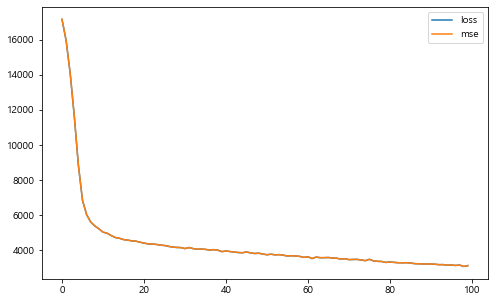

In [176]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [177]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [178]:
for t,p in zip(y_train,y_train_p):
    print(t,p)

[56.] [60.987896]
[63.] [52.725574]
[77.] [139.17744]
[113.] [122.825264]
[210.] [188.61406]
[241.] [239.01125]
[72.] [114.87356]
[114.] [89.96656]
[46.] [102.20816]
[62.] [79.70579]
[56.] [56.84406]
[81.] [87.66238]
[42.] [55.052357]
[56.] [67.17216]
[214.] [183.75125]
[46.] [70.98127]
[68.] [111.919014]
[98.] [96.212074]
[49.] [52.518547]
[47.] [66.48894]
[141.] [140.96758]
[86.] [71.6379]
[124.] [167.24738]
[252.] [172.59749]
[109.] [116.09988]
[50.] [50.715504]
[86.] [85.808174]
[45.] [70.58448]
[234.] [190.19778]
[62.] [169.30132]
[98.] [96.26879]
[134.] [121.55467]
[85.] [92.73955]
[125.] [89.5149]
[203.] [142.27347]
[51.] [41.662205]
[148.] [191.50667]
[599.] [238.23505]
[56.] [47.976074]
[53.] [54.641163]
[104.] [106.246376]
[125.] [114.062515]
[47.] [71.78571]
[64.] [88.76356]
[281.] [185.47752]
[147.] [146.89534]
[56.] [67.11622]
[91.] [85.50733]
[90.] [98.47013]
[51.] [48.771957]
[61.] [75.93119]
[176.] [179.4952]
[215.] [163.85866]
[92.] [95.48374]
[60.] [75.732086]
[96.] [

In [179]:
for t,p in zip(y_test,y_test_p):
    print(t,p)

[147.] [138.47673]
[75.] [154.58615]
[58.] [55.61067]
[115.] [86.976204]
[89.] [98.19588]
[43.] [104.63014]
[90.] [217.8203]
[88.] [111.52886]
[66.] [91.48281]
[63.] [88.34547]
[111.] [162.52165]
[79.] [79.02687]
[137.] [91.011925]
[72.] [67.23845]
[432.] [202.2482]
[95.] [75.874565]
[127.] [144.52094]
[78.] [87.32252]
[68.] [29.986605]
[60.] [70.65178]
[67.] [101.71166]
[66.] [43.590702]
[67.] [66.91717]
[112.] [95.02262]
[94.] [65.47787]
[124.] [175.90343]
[79.] [71.98815]
[123.] [198.14265]
[71.] [116.62699]
[127.] [57.954082]
[112.] [121.71819]
[101.] [74.69652]
[103.] [86.47701]
[69.] [71.25587]
[152.] [97.662346]
[51.] [66.85438]
[106.] [97.03651]
[46.] [87.88613]
[60.] [49.19794]
[74.] [115.75929]
[124.] [146.13245]
[59.] [44.2195]
[45.] [66.61707]
[73.] [60.189945]
[74.] [142.4871]
[163.] [89.443245]
[51.] [73.350105]
[48.] [90.52885]
[167.] [136.94762]
[65.] [129.75188]
[55.] [77.31422]
[120.] [101.79783]
[56.] [56.45666]
[78.] [141.32086]
[110.] [134.76181]
[64.] [134.3721]
[

In [180]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

#오차 범위 3 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 5 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


#======================================================================================


#오차 범위 20 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도

In [181]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 9.61 %
test set prediction accuracy: 14.08 %


In [182]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 12.46 % <br>
- test set prediction accuracy(+-3): 7.04 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 22.42 % <br>
- test set prediction accuracy(+-5): 9.86 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 38.08 % <br>
- test set prediction accuracy(+-10): 21.13 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 62.99 % <br>
- test set prediction accuracy(+-20): 40.85 % <br>


# <Y=TG>
## 1. 임의+선별
### <오차범위 3>
- train set prediction accuracy(+-3): 8.90 % <br>
- test set prediction accuracy(+-3): 8.45 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 14.23 % <br>
- test set prediction accuracy(+-5): 14.08 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 26.69 % <br>
- test set prediction accuracy(+-10): 28.17 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 49.82 % <br>
- test set prediction accuracy(+-20): 53.52 % <br>

## 2. 임의+선별+PSQI
### <오차범위 3>
- train set prediction accuracy(+-3): 12.46 % <br>
- test set prediction accuracy(+-3): 7.04 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 22.42 % <br>
- test set prediction accuracy(+-5): 9.86 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 38.08 % <br>
- test set prediction accuracy(+-10): 21.13 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 62.99 % <br>
- test set prediction accuracy(+-20): 40.85 % <br>


## 3. PSQI+AGE+SEX+BMI+Fat+Fat_percentage+Waist
### <오차범위 3>
- train set prediction accuracy(+-3): 7.83 % <br>
- test set prediction accuracy(+-3): 2.82 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 14.59 % <br>
- test set prediction accuracy(+-5): 9.86 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 36.30 % <br>
- test set prediction accuracy(+-10): 19.72 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 61.57 % <br>
- test set prediction accuracy(+-20): 43.66 % <br>